In [2]:
import csv
import numpy as np
data = []
with open("ANWB.csv", "r") as file:
    csvreader = csv.reader(file)
    for row in csvreader:
            row1 = []
            for i,e in enumerate(row):
                row1.append(float(e))
            data.append(row1)

step = np.array(data)
data = []
for i,row in enumerate(step.T):
     if i != 0 and i != 16 and  i !=20 and i != 40 and  i !=62 and  i !=63:
          data.append(row)

In [4]:
import matplotlib.pyplot as plt

def PlotSpectogram(Data,Db = 45,NFFT=int(2**17),up = 1000,low = 0,fs=50e3):
    #Plots the amplitude to indentify if this is sufficient for the spectogram
    plt.plot(Data)
    #Formatting of plot
    plt.title('Amplitude Plot')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()

    #Plots the spectogram
    fig, ax = plt.subplots()
    cmap = plt.get_cmap('jet')
    vmin = 20*np.log10(np.max(Data)) - Db  # hide anything below -40 dBc
    pxx,  freq, t, cax = ax.specgram(Data, Fs=fs, NFFT=NFFT, vmin=vmin, cmap=cmap)
    #Formatting of plot
    fig.colorbar(cax)
    plt.title('Spectogram For Chosen Microphone')
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    #Restricts the displayed frequency range
    plt.ylim(low,up)
    print(freq[np.where(np.isclose(pxx, max(pxx)))[0]])

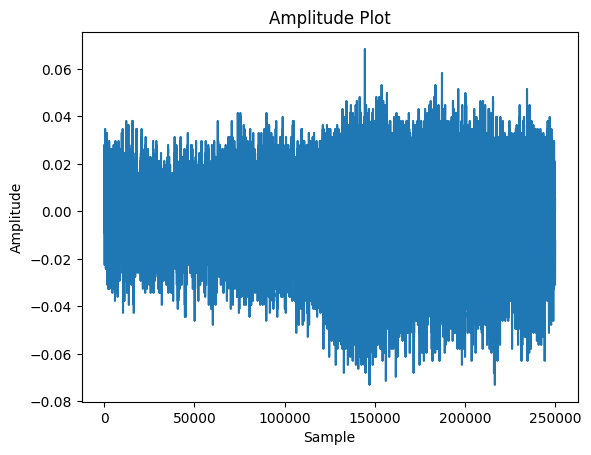

[205.61218262]


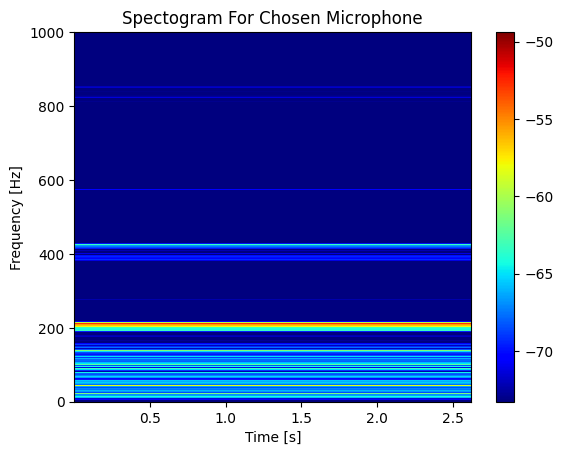

In [5]:
Data = data[5]
PlotSpectogram(Data,50,up=1000)